In [ ]:
!pip install pandas

In [2]:
import pandas as pd
import numpy as np

arr = np.array([12,24,36,52,68],dtype='int64') 
index = np.array(['a','b','c','d','e'])
print(pd.Series(arr,index,name='Numbers')) #Series(Array,Index,Name)

# Using Dictionary Values
dict = {'a':[12,23],'b':[24,34],'c':[36,42],'d':[52,58],'e':[68,73]}
print(pd.Series(dict,name="Numbers"))

a    12
b    24
c    36
d    52
e    68
Name: Numbers, dtype: int64
a    [12, 23]
b    [24, 34]
c    [36, 42]
d    [52, 58]
e    [68, 73]
Name: Numbers, dtype: object


In [3]:
#DataFrame Creation
df = {"Car":["Audi","bmw"],
     "Fuel":["cng","ev"]}

l1 = [["Vinay",19],["Abhi",23],["Aniketh",4],["Rohtih",9]]
pd.DataFrame(l1,columns=["Name","Age"])

,Name,Age
0,Vinay,19
1,Abhi,23
2,Aniketh,4
3,Rohtih,9


In [4]:
#Read CSV Files
file = pd.read_csv("C:/Users/SDES/Downloads/508/Car-Data.csv")
# file.head(n)
# file.tail(n)
# file.info()
print(file.shape)
file.info()
file

(4340, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [5]:
file = pd.read_csv("C:/Users/SDES/Downloads/508/Car-Data.csv")

# Data-Cleaning
# 1)Remove Null Values (Can use [isnull] or [isna])
print(file.isna().sum()) #To Check No of Null Values in Each Column

# 2)drop or filling null values
#drop null values -> dropna()
#fill null values -> fillna()  #[[Int or Float : mean,median],[char : mode]]


# 3)Drop Duplicates
print(file.duplicated().sum())  #700+ duplicates
file.drop_duplicates(inplace=True)
print(file.duplicated().sum())  #0 duplicates

# 4) List out only the Car name
car_name = []
for i in file['name']:
    car_name.append(i.split()[0])

# Reassigning the Newly Generated CarNames
file['name'] = car_name
file

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64
763
0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [6]:
file["CarName"] = car_name  # New Column named "CarName" is Created with values 'l'

# Renaming 'name' --> 'Name'
file.rename(columns={"name": "Name"}, inplace=True)

# Renaming 'Name' back to 'name'
file.rename(columns={"Name": "name"}, inplace=True)

# dropping column named "CarName" (No Usage since 'name' is already present)
file.drop(columns="CarName",axis=1,inplace=True)  # can use 'labels' instead of 'columns'
file

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


### Exploratory Analysis
#### The process of analyzing a dataset to understand its main characteristics, patterns, and structure

### Types :
#### 1) Uni-variant : count plot, dis plot
#### 2) Bi-variant : bar plot, scatter plot, line chart
#### 3) multi-variant : pair plot
#### 4) correlation : heatmap

## 1) Univariant

In [ ]:
%pip install seaborn
%pip install matplotlib

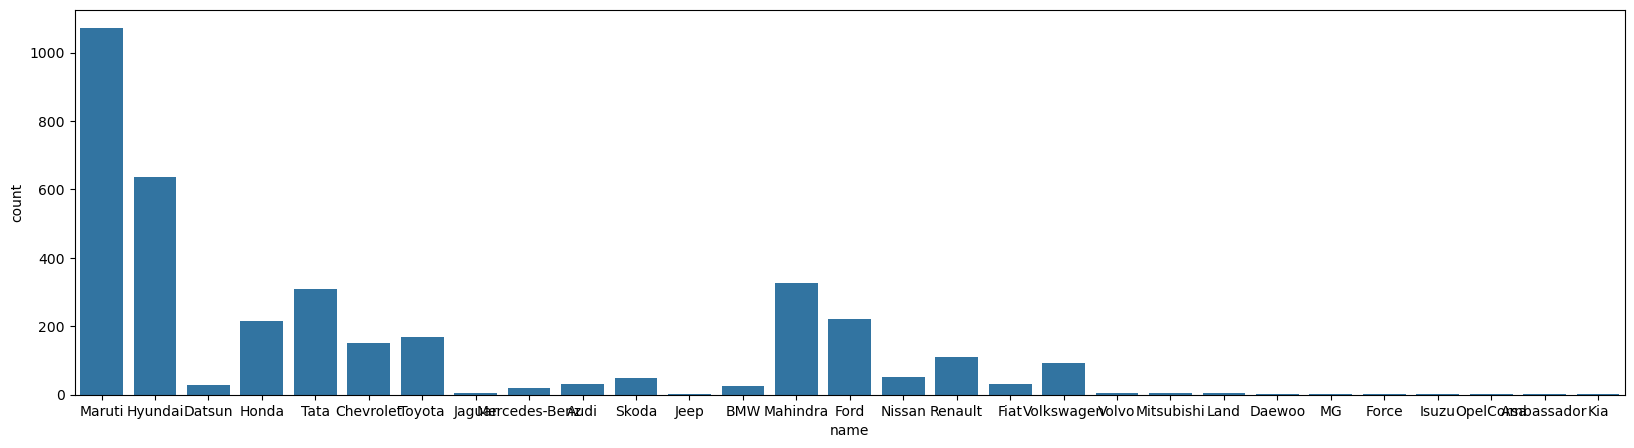

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count Plot
plt.figure(figsize=[20,5])
sns.countplot(data=file,x="name")
plt.show()

- Most of The Cars are of Maruthi

<Figure size 1300x500 with 0 Axes>

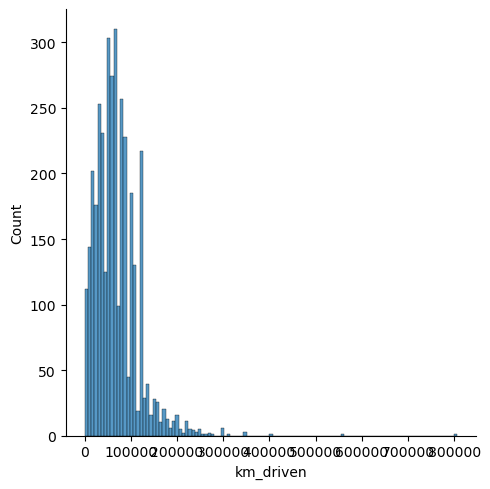

In [10]:
# Dis Plot
plt.figure(figsize=[13,5])
sns.displot(data=file,x="km_driven")
plt.show()

In [ ]:
## 2) Bi-variant

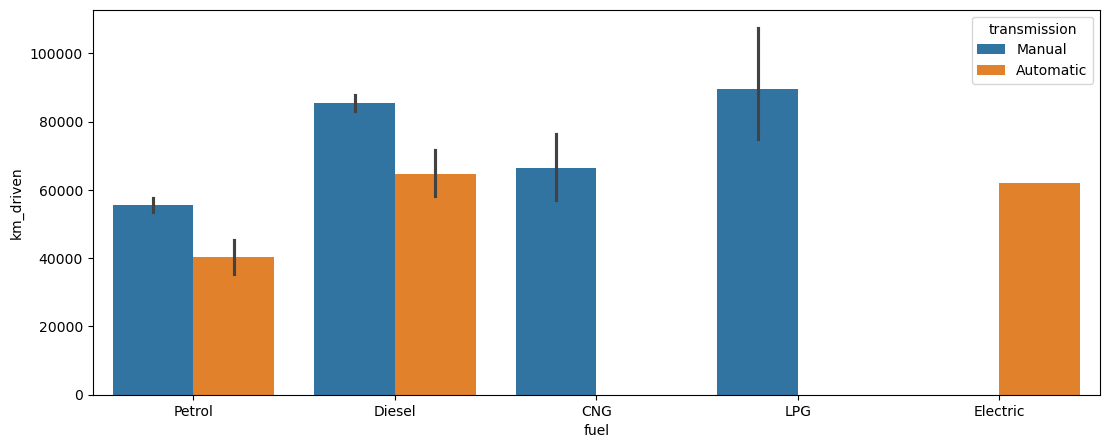

In [28]:
# bar plot
plt.figure(figsize=[13,5])
sns.barplot(data=file,x="fuel",y="km_driven",hue="transmission")
plt.show()

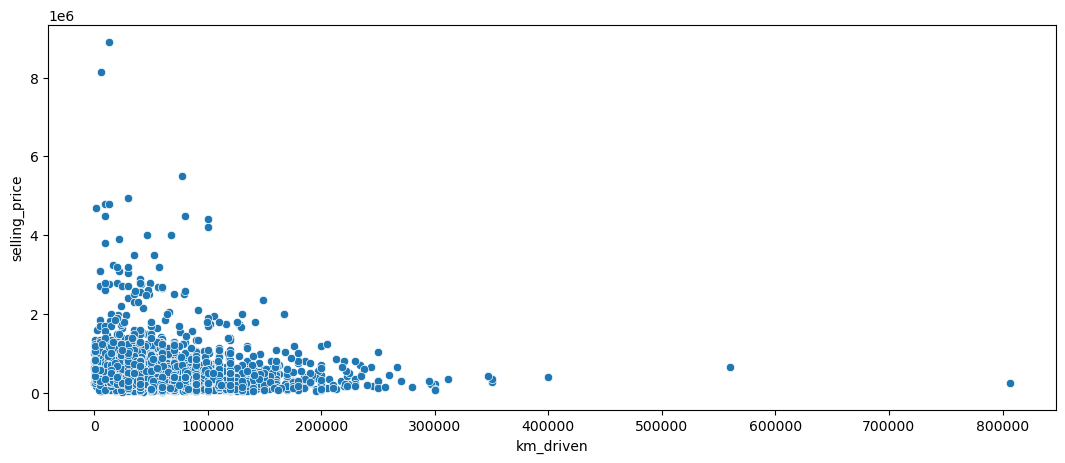

In [12]:
# scatter plot
plt.figure(figsize=[13,5])
sns.scatterplot(data=file,x="km_driven",y="selling_price")
plt.show()

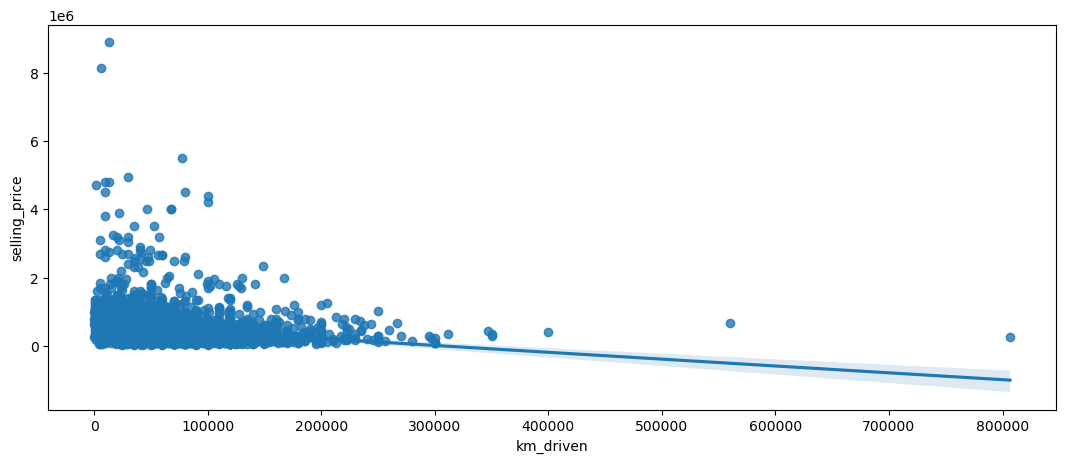

In [13]:
# regression plot
plt.figure(figsize=[13,5])
sns.regplot(data=file,x="km_driven",y="selling_price")
plt.show()

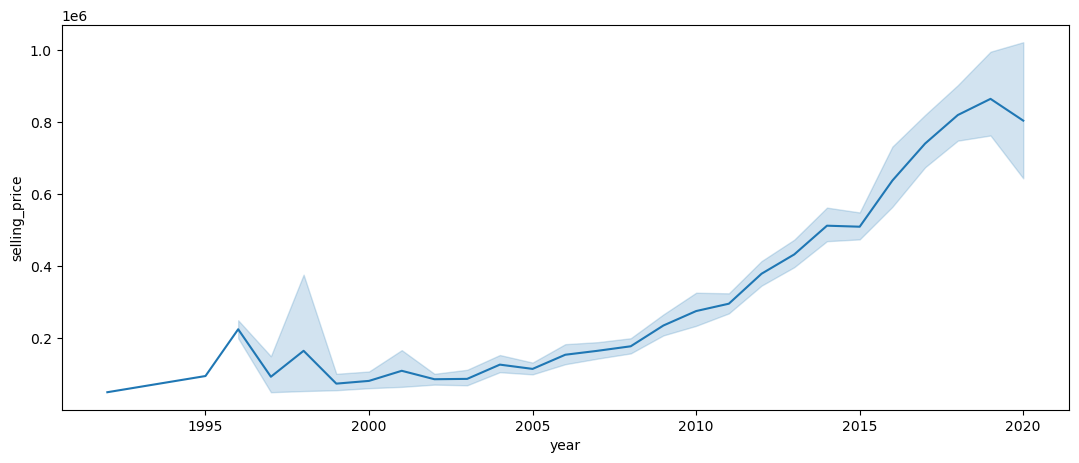

In [14]:
# line plot
plt.figure(figsize=[13,5])
sns.lineplot(data=file,x="year",y="selling_price")
plt.show()

## 3) Multi-variant

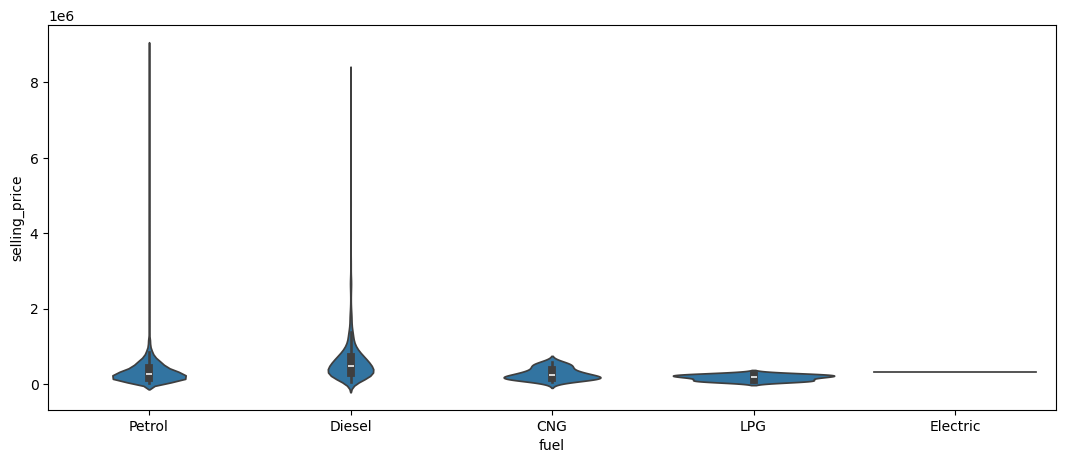

In [24]:
# violin plot
plt.figure(figsize=[13,5])
sns.violinplot(data=file,x="fuel",y="selling_price")
plt.show()

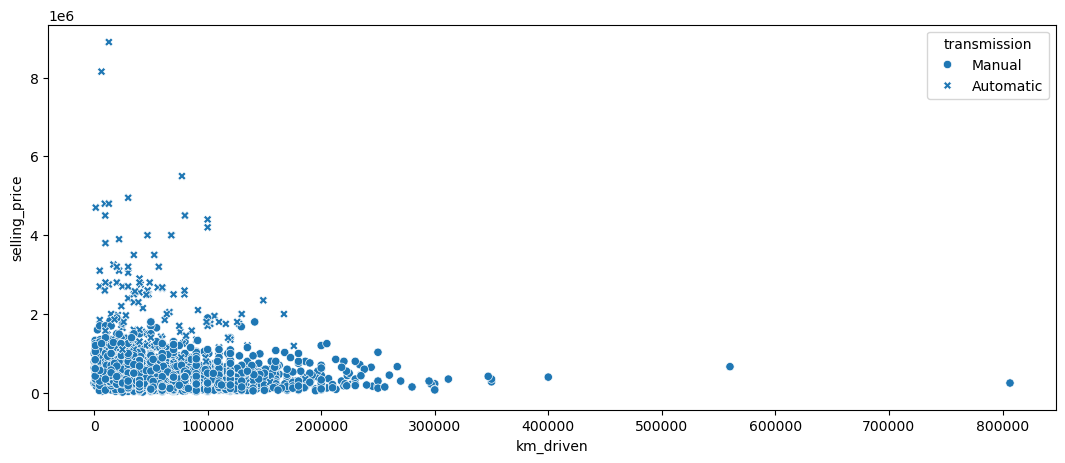

In [25]:
# violin plot
plt.figure(figsize=[13,5])
sns.scatterplot(data=file,x="km_driven",y="selling_price",style="transmission")
plt.show()

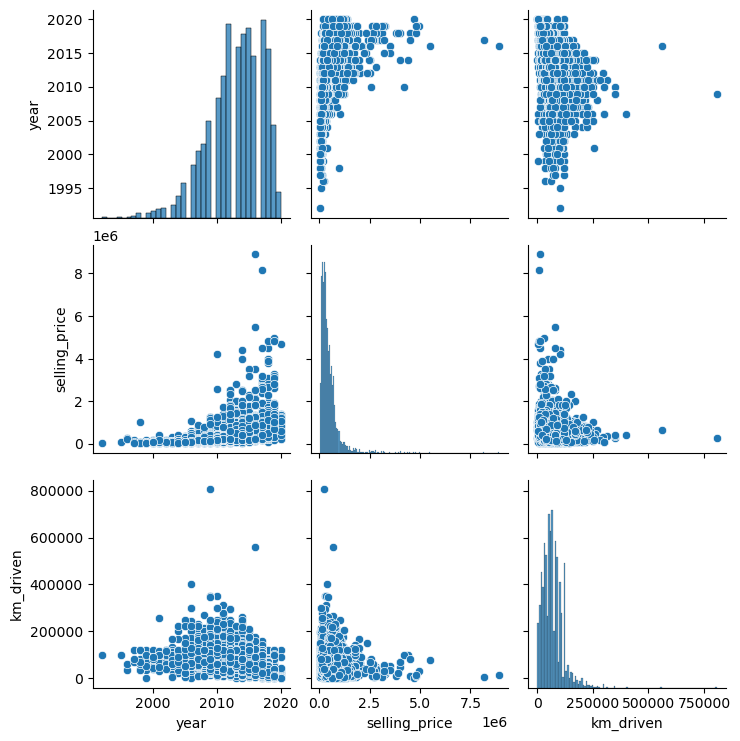

In [31]:
#pair plot
sns.pairplot(file)

## Correlation

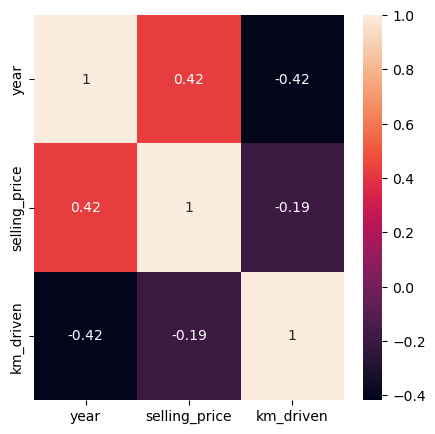

In [37]:
#heatmap
plt.figure(figsize=[5,5,])
sns.heatmap(data=file.corr(numeric_only=True),annot=True)
plt.show()